In this notebook, we want to get a first perception of the dataset.

In [2]:
import pandas as pd
df = pd.read_csv('./df_withcompany.csv')
df.head()

,icao24_callsign,min_vertrate_spd_climb,max_vertrate_spd_climb,min_spd_climb,max_spd_climb,delta_h_climb,vertrate_std_spd_climb,vertrate_avg_spd_climb,std_spd_climb,avg_spd_climb,...,max_vertrate_spd_descent,min_spd_descent,max_spd_descent,delta_h_descent,vertrate_std_spd_descent,vertrate_avg_spd_descent,std_spd_descent,avg_spd_descent,duration_descent,operatorcallsign
0,020108_MAC266,0.00000,23.73376,72.040531,231.708342,10546.08,5.646865,9.521831,43.345834,176.165576,...,0.32512,59.080483,226.124327,-11033.76,4.979558,-8.045507,56.977349,158.548631,1420,MALTA CHARTER
1,06a08d_QTR3485,-0.32512,14.63040,90.086474,239.974203,10744.20,3.234501,6.141377,35.152508,209.307688,...,0.32512,67.252609,241.052561,-10888.98,2.628688,-5.726423,55.054771,164.937370,2090,QATARI
2,06a091_QTR3281,0.32512,16.58112,67.635203,245.416210,11094.72,3.098535,6.474980,40.874531,209.151110,...,0.32512,63.284976,236.053570,-11186.16,4.973232,-6.981524,58.628951,152.980904,2030,QATARI
3,33ffc1_IAM3174,0.32512,17.55648,74.024541,257.401478,10896.60,3.609616,9.387840,54.463798,204.257835,...,1.62560,69.373684,260.650047,-11186.16,8.331098,-9.346615,61.177911,179.921102,1730,Italian Airforce
4,34134e_IBE34BP,2.27584,17.88160,71.093853,246.227431,10751.82,3.276368,8.927853,50.655721,199.158926,...,0.32512,53.197092,254.696024,-10637.52,4.243448,-7.746113,58.320335,179.967827,1430,IBERIA


<AxesSubplot:>

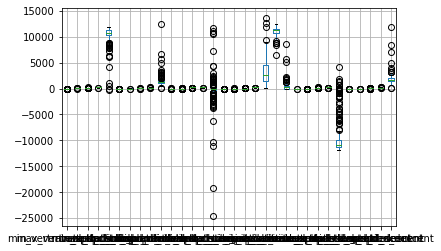

In [3]:
df1 = df.drop('icao24_callsign',axis = 1)
df1.boxplot()

To prepare for the machine learning step, one can normalize it and make it a Gaussian with zero mean and unit variance.

In [4]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

X_train = df1.drop('operatorcallsign',axis=1)
X_scaled = preprocessing.scale(X_train)
y = df1.operatorcallsign

Compute a PCA to reduce the dimension:

In [5]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized',
          whiten=True).fit(X_train)
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_[:8])

0.9998885043744571

We can use the first eight variables to represent 99.989% of variability.

In [7]:
pca = PCA(n_components = 8, svd_solver='randomized',
          whiten=True).fit(X_train)
X_normalized_PCA= pca.transform(X_train)

In [11]:
y.value_counts()

EASY                 28
EUROWINGS            21
LUFTHANSA            20
AIRFRANS             20
WIZZ AIR             16
IBERIA               15
SPEEDBIRD            15
BEE-LINE             12
VUELING              10
SWISS                 9
GERMAN WINGS          7
FINNAIR               6
EDELWEISS             6
ALITALIA              5
AUSTRIAN              5
AIR SERBIA            5
AIR AZORES            4
UNITED                4
CROATIA               4
SHAMROCK              4
AIR PORTUGAL          4
AMERICAN              3
AIR MALTA             3
CEDAR JET             3
AEGEAN                3
QATARI                2
DELTA                 2
AIR CANADA            2
IFLY                  2
FLYING BULGARIA       1
AIR BERLIN            1
THOMAS COOK           1
ALLEGIANT             1
VOLOTEA               1
MALTA CHARTER         1
VIET NAM AIRLINES     1
LAUDA MOTION          1
Italian Airforce      1
JETBLUE               1
ALPINE                1
SPIRIT WINGS          1
Name: operatorca

In [35]:
cut = int(len(X_normalized_PCA)*0.75)
X_train = X_normalized_PCA[:cut]
y_train = y[:cut]
X_test = X_normalized_PCA[cut:]
y_test = y[cut:]

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1000, random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.015873015873015872

In [45]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_normalized_PCA, y, cv=5)
scores.mean()

/Users/z.wu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.09490196078431373